In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf

import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

# ============================================================
# 2. Ticker Definitions (Your Lists)
# ============================================================

# ---------- INDIA ----------
invits_india = [
    "IRBINVIT.NS",   # IRB InvIT
    "INDIGRID.NS",   # India Grid Trust
    "PGINVIT.NS"     # PowerGrid InvIT
]

reits_india = [
    "EMBASSY.NS",     # Embassy Office Parks REIT
    "MINDSPACE.NS",   # Mindspace Business Parks REIT
    "BIRET.NS"        # Nexus Select Trust
]

stocks_india = [
    "IRB.NS",
    "LT.NS",
    "ADANIPORTS.NS",
    "NTPC.NS",
    "POWERGRID.NS"
]

# Market proxies (priority order; we will pick FIRST one that exists in data)
market_priority_india = [
    "INFRABEES.NS",   # Nippon India Infra ETF
    "^CNXINFRA",      # Nifty Infra
    "^NSEI"           # Nifty 50
]

# ---------- US ----------
reits_us = [
    "AMT",   # American Tower
    "CCI",   # Crown Castle
    "EQIX",  # Equinix
    "DLR",   # Digital Realty
]

mlps_us = [
    "EPD",   # Enterprise Products Partners
    "ET",    # Energy Transfer
    "MPLX",  # MPLX LP
]

stocks_us = [
    "BIP",   # Brookfield Infrastructure Partners
    "NEE",   # NextEra Energy
    "DUK",   # Duke Energy
]

indices_us = [
    "IFRA",  # iShares U.S. Infrastructure ETF
    "PAVE",  # Global X U.S. Infrastructure Dev ETF
    "SPY",   # S&P 500 ETF
]

# ---------- EUROPE ----------
reits_eu = [
    "CLNX.MC",  # Cellnex Telecom
]

stocks_eu = [
    "FER.MC",   # Ferrovial
    "NGG",      # National Grid
    "IBDRY",    # Iberdrola (ADR)
    "ENEL.MI",  # Enel
    "RWE.DE",   # RWE
    "ENGI.PA",  # Engie
]

indices_eu = [
    "VGK",      # Vanguard FTSE Europe ETF
]

all_tickers = sorted(set(
    invits_india
    + reits_india
    + stocks_india
    + market_priority_india
    + reits_us
    + mlps_us
    + stocks_us
    + indices_us
    + reits_eu
    + stocks_eu
    + indices_eu
))

print("Total tickers to download:", len(all_tickers))
print(all_tickers)

start_date = "2015-01-01"

# auto_adjust=True => 'Close' is already adjusted, no 'Adj Close' column
data = yf.download(all_tickers, start=start_date, auto_adjust=True)

print("Downloaded columns:", data.columns)

# Use Close prices as adjusted prices
prices = data["Close"].copy()

# Drop columns that are completely NaN
prices = prices.dropna(axis=1, how="all")

print("prices shape:", prices.shape)
prices.tail()

Total tickers to download: 35
['ADANIPORTS.NS', 'AMT', 'BIP', 'BIRET.NS', 'CCI', 'CLNX.MC', 'DLR', 'DUK', 'EMBASSY.NS', 'ENEL.MI', 'ENGI.PA', 'EPD', 'EQIX', 'ET', 'FER.MC', 'IBDRY', 'IFRA', 'INDIGRID.NS', 'INFRABEES.NS', 'IRB.NS', 'IRBINVIT.NS', 'LT.NS', 'MINDSPACE.NS', 'MPLX', 'NEE', 'NGG', 'NTPC.NS', 'PAVE', 'PGINVIT.NS', 'POWERGRID.NS', 'RWE.DE', 'SPY', 'VGK', '^CNXINFRA', '^NSEI']


[*********************100%***********************]  35 of 35 completed


Downloaded columns: MultiIndex([( 'Close', 'ADANIPORTS.NS'),
            ( 'Close',           'AMT'),
            ( 'Close',           'BIP'),
            ( 'Close',      'BIRET.NS'),
            ( 'Close',           'CCI'),
            ( 'Close',       'CLNX.MC'),
            ( 'Close',           'DLR'),
            ( 'Close',           'DUK'),
            ( 'Close',    'EMBASSY.NS'),
            ( 'Close',       'ENEL.MI'),
            ...
            ('Volume',           'NGG'),
            ('Volume',       'NTPC.NS'),
            ('Volume',          'PAVE'),
            ('Volume',    'PGINVIT.NS'),
            ('Volume',  'POWERGRID.NS'),
            ('Volume',        'RWE.DE'),
            ('Volume',           'SPY'),
            ('Volume',           'VGK'),
            ('Volume',     '^CNXINFRA'),
            ('Volume',         '^NSEI')],
           names=['Price', 'Ticker'], length=175)
prices shape: (2834, 35)


Ticker,ADANIPORTS.NS,AMT,BIP,BIRET.NS,CCI,CLNX.MC,DLR,DUK,EMBASSY.NS,ENEL.MI,...,NGG,NTPC.NS,PAVE,PGINVIT.NS,POWERGRID.NS,RWE.DE,SPY,VGK,^CNXINFRA,^NSEI
Date,,,,,,,,,,,,,,,,,,,,,
2025-11-24,1485.900024,179.570007,35.290001,316.100006,89.019997,25.650000,159.009995,122.089996,433.049988,8.860,...,73.540001,323.450012,46.980000,94.830002,275.799988,44.080002,668.729980,78.889999,9589.299805,25959.500000
2025-11-25,1483.900024,179.759995,35.799999,323.720001,89.400002,25.709999,157.369995,121.930000,428.350006,8.777,...,74.070000,323.700012,47.980000,94.489998,273.450012,43.410000,675.020020,80.239998,9589.549805,25884.800781
2025-11-26,1506.199951,181.240005,36.090000,329.410004,90.550003,25.850000,158.910004,123.430000,424.869995,8.830,...,75.510002,326.100006,48.299999,94.440002,275.049988,44.110001,679.679993,81.000000,9698.250000,26205.300781
2025-11-27,1509.099976,NaN,NaN,329.850006,NaN,25.950001,NaN,NaN,426.440002,8.900,...,NaN,327.350006,NaN,94.900002,273.700012,43.439999,NaN,NaN,9682.000000,26215.550781
2025-11-28,1531.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,269.899994,NaN,NaN,NaN,9663.799805,26223.050781


In [ ]:
# 'prices' should already exist from your previous notebook.
# If not, you can import/merge it before this cell.

assert 'prices' in globals(), "You need a DataFrame 'prices' with all tickers as columns."

# 1. Pick Indian market proxy
def pick_first_available(candidates, price_cols):
    for t in candidates:
        if t in price_cols:
            return t
    return None

india_mkt = pick_first_available(market_priority_india, prices.columns)
us_mkt    = pick_first_available(indices_us, prices.columns)
eu_mkt    = pick_first_available(indices_eu, prices.columns)

print("Chosen India market proxy :", india_mkt)
print("Chosen US market proxy    :", us_mkt)
print("Chosen EU market proxy    :", eu_mkt)

# 2. Daily log returns for all assets
returns = np.log(prices / prices.shift(1)).dropna()

returns.head()


Chosen India market proxy : INFRABEES.NS
Chosen US market proxy    : IFRA
Chosen EU market proxy    : VGK


Ticker,ADANIPORTS.NS,AMT,BIP,BIRET.NS,CCI,CLNX.MC,DLR,DUK,EMBASSY.NS,ENEL.MI,...,NGG,NTPC.NS,PAVE,PGINVIT.NS,POWERGRID.NS,RWE.DE,SPY,VGK,^CNXINFRA,^NSEI
Date,,,,,,,,,,,,,,,,,,,,,
2021-05-17,0.027762,-0.003532,0.012441,-0.014294,0.004902,0.010059,-0.004443,-0.005936,0.009042,-0.005746,...,0.001367,0.001345,-0.001118,0.015416,-0.001968,-0.004685,-0.002548,-0.000442,0.005765,0.016578
2021-05-18,0.028366,0.001869,0.000562,-0.009846,0.004222,0.000870,0.011338,0.000390,0.020369,-0.003561,...,0.001365,0.004919,-0.019572,0.025860,0.020369,0.005620,-0.008653,0.000883,0.011813,0.012317
2021-05-19,-0.004521,-0.001259,0.009318,0.026385,-0.005046,0.008658,0.000666,-0.013062,0.003461,-0.020132,...,-0.002429,-0.001339,-0.015320,0.027930,0.002784,-0.010642,-0.002625,-0.010948,-0.001669,-0.005173
2021-05-27,-0.009141,-0.001376,0.005937,0.002162,0.004819,-0.002830,-0.005247,-0.010939,0.012736,-0.001472,...,-0.007425,-0.007227,0.010643,0.001958,0.011897,-0.028198,0.000525,0.003058,0.002971,0.002376
2021-05-28,0.032408,0.005299,0.002955,0.004430,0.001162,0.008265,0.009214,0.002098,0.002112,-0.000491,...,-0.003284,-0.012315,0.001511,-0.002314,-0.012562,0.002247,0.001787,0.002469,0.011891,0.006356


In [ ]:
# --- Indian market proxy series (Target 1) ---
if india_mkt is None:
    raise ValueError("No Indian market proxy found in price data.")
ret_india_mkt = returns[india_mkt].rename("ret_india_mkt")

# --- Indian InvIT factor (Target 2) ---
invits_india_avail = [t for t in invits_india if t in returns.columns]
if len(invits_india_avail) == 0:
    print("Warning: No Indian InvIT tickers found in returns. InvIT factor will be NaN.")
    ret_invits_india = pd.Series(index=returns.index, data=np.nan, name="ret_invits_india")
else:
    ret_invits_india = returns[invits_india_avail].mean(axis=1).rename("ret_invits_india")

# --- US market proxy ---
if us_mkt is None:
    raise ValueError("No US market proxy found in price data.")
ret_us_mkt = returns[us_mkt].rename("ret_us_mkt")

# --- EU market proxy ---
if eu_mkt is None:
    print("Warning: No EU market proxy found in price data. EU series will be NaN.")
    ret_eu_mkt = pd.Series(index=returns.index, data=np.nan, name="ret_eu_mkt")
else:
    ret_eu_mkt = returns[eu_mkt].rename("ret_eu_mkt")

# Combine into one DataFrame (we will create lags later)
df_base = pd.concat([ret_india_mkt, ret_invits_india, ret_us_mkt, ret_eu_mkt], axis=1)

df_base.tail()


,ret_india_mkt,ret_invits_india,ret_us_mkt,ret_eu_mkt
Date,,,,
2025-11-20,0.003829,-0.001838,-0.008434,-0.013769
2025-11-21,-0.001221,0.003866,0.013110,0.015160
2025-11-24,-0.008844,-0.004368,0.010347,-0.002532
2025-11-25,0.001283,-0.000670,0.013663,0.016968
2025-11-26,0.009072,-0.000594,0.011886,0.009427


In [ ]:
def make_lagged_df(df, target_col, us_col, eu_col, p=5, drop_na=True):
    """
    df: DataFrame with columns [target_col, us_col, eu_col]
    All returns indexed by date.
    We create lagged features for AR and ARX models.
    """

    data = pd.DataFrame(index=df.index)
    data[target_col] = df[target_col]

    # Indian lags (AR part)
    for lag in range(1, p+1):
        data[f"{target_col}_l{lag}"] = df[target_col].shift(lag)

    # US lags
    if us_col is not None:
        for lag in range(1, p+1):
            data[f"{us_col}_l{lag}"] = df[us_col].shift(lag)

    # EU lags
    if eu_col is not None:
        for lag in range(1, p+1):
            data[f"{eu_col}_l{lag}"] = df[eu_col].shift(lag)

    if drop_na:
        data = data.dropna()

    return data

# Choose lag order
P_LAGS = 5

# 1) For Indian market proxy target
df_mkt = make_lagged_df(
    df_base[["ret_india_mkt", "ret_us_mkt", "ret_eu_mkt"]],
    target_col="ret_india_mkt",
    us_col="ret_us_mkt",
    eu_col="ret_eu_mkt",
    p=P_LAGS
)

# 2) For Indian InvIT factor target
df_invits = make_lagged_df(
    df_base[["ret_invits_india", "ret_us_mkt", "ret_eu_mkt"]],
    target_col="ret_invits_india",
    us_col="ret_us_mkt",
    eu_col="ret_eu_mkt",
    p=P_LAGS
)

df_mkt.head()


,ret_india_mkt,ret_india_mkt_l1,ret_india_mkt_l2,ret_india_mkt_l3,ret_india_mkt_l4,ret_india_mkt_l5,ret_us_mkt_l1,ret_us_mkt_l2,ret_us_mkt_l3,ret_us_mkt_l4,ret_us_mkt_l5,ret_eu_mkt_l1,ret_eu_mkt_l2,ret_eu_mkt_l3,ret_eu_mkt_l4,ret_eu_mkt_l5
Date,,,,,,,,,,,,,,,,
2021-06-02,0.011987,0.009592,0.000593,-0.002321,0.012656,0.004682,0.000276,0.006379,-0.009170,-0.009087,0.000548,0.002469,0.003058,-0.010948,0.000883,-0.000442
2021-06-03,-0.010445,0.011987,0.009592,0.000593,-0.002321,0.012656,-0.006299,0.000276,0.006379,-0.009170,-0.009087,0.001439,0.002469,0.003058,-0.010948,0.000883
2021-06-04,0.023578,-0.010445,0.011987,0.009592,0.000593,-0.002321,0.003017,-0.006299,0.000276,0.006379,-0.009170,-0.007067,0.001439,0.002469,0.003058,-0.010948
2021-06-07,0.017111,0.023578,-0.010445,0.011987,0.009592,0.000593,0.001369,0.003017,-0.006299,0.000276,0.006379,0.008216,-0.007067,0.001439,0.002469,0.003058
2021-06-08,0.000986,0.017111,0.023578,-0.010445,0.011987,0.009592,0.001640,0.001369,0.003017,-0.006299,0.000276,0.004583,0.008216,-0.007067,0.001439,0.002469


In [ ]:
def time_series_train_test_split(df, target_col, split_date="2022-01-01"):
    """
    df: DataFrame with target and features (already lagged).
    target_col: name of the target column.
    split_date: string 'YYYY-MM-DD'. All dates < split_date in train, >= in test.
    """
    df = df.sort_index()

    train_mask = df.index < split_date
    test_mask  = df.index >= split_date

    train = df.loc[train_mask].copy()
    test  = df.loc[test_mask].copy()

    y_train = train[target_col]
    X_train = train.drop(columns=[target_col])

    y_test = test[target_col]
    X_test = test.drop(columns=[target_col])

    return X_train, y_train, X_test, y_test

SPLIT_DATE = "2022-01-01"  # tweak as you like


In [ ]:
def fit_predict_ols_models(df_lagged, target_col, split_date, show_summary=False):
    """
    Fits:
      - AR model (India lags only)
      - ARX model (India + US + EU lags)
    Returns a dict with metrics and fitted models.
    """

    # Identify columns
    all_cols = df_lagged.columns.tolist()
    india_lag_cols = [c for c in all_cols if c.startswith(target_col + "_l")]
    us_lag_cols    = [c for c in all_cols if "_us_mkt_l" in c]
    eu_lag_cols    = [c for c in all_cols if "_eu_mkt_l" in c]

    # Train/test split for full (ARX) dataset
    X_train_full, y_train, X_test_full, y_test = time_series_train_test_split(
        df_lagged, target_col, split_date
    )

    # --- AR (India-only) ---
    X_train_ar = X_train_full[india_lag_cols]
    X_test_ar  = X_test_full[india_lag_cols]

    X_train_ar_const = sm.add_constant(X_train_ar)
    X_test_ar_const  = sm.add_constant(X_test_ar)

    model_ar = sm.OLS(y_train, X_train_ar_const).fit()

    y_pred_ar_train = model_ar.predict(X_train_ar_const)
    y_pred_ar_test  = model_ar.predict(X_test_ar_const)

    # Metrics AR
    rmse_ar  = np.sqrt(mean_squared_error(y_test, y_pred_ar_test))
    r2_ar    = r2_score(y_test, y_pred_ar_test)

    dir_acc_ar = np.mean(np.sign(y_pred_ar_test) == np.sign(y_test))

    # --- ARX (India + US + EU) ---
    X_train_arx = X_train_full[india_lag_cols + us_lag_cols + eu_lag_cols]
    X_test_arx  = X_test_full[india_lag_cols + us_lag_cols + eu_lag_cols]

    X_train_arx_const = sm.add_constant(X_train_arx)
    X_test_arx_const  = sm.add_constant(X_test_arx)

    model_arx = sm.OLS(y_train, X_train_arx_const).fit()

    y_pred_arx_train = model_arx.predict(X_train_arx_const)
    y_pred_arx_test  = model_arx.predict(X_test_arx_const)

    # Metrics ARX
    rmse_arx  = np.sqrt(mean_squared_error(y_test, y_pred_arx_test))
    r2_arx    = r2_score(y_test, y_pred_arx_test)
    dir_acc_arx = np.mean(np.sign(y_pred_arx_test) == np.sign(y_test))

    if show_summary:
        print("=== AR (India-only) summary ===")
        print(model_ar.summary())
        print("\n=== ARX (India+US+EU) summary ===")
        print(model_arx.summary())

    metrics = {
        "rmse_ar": rmse_ar,
        "r2_ar": r2_ar,
        "dir_acc_ar": dir_acc_ar,
        "rmse_arx": rmse_arx,
        "r2_arx": r2_arx,
        "dir_acc_arx": dir_acc_arx,
        "model_ar": model_ar,
        "model_arx": model_arx,
        "y_test": y_test,
        "y_pred_ar_test": y_pred_ar_test,
        "y_pred_arx_test": y_pred_arx_test,
    }

    return metrics

# Run for Indian market proxy
metrics_mkt = fit_predict_ols_models(df_mkt, "ret_india_mkt", SPLIT_DATE, show_summary=False)
print("=== Indian Market Proxy: AR vs ARX ===")
print(metrics_mkt)

# Run for Indian InvIT factor
metrics_invits = fit_predict_ols_models(df_invits, "ret_invits_india", SPLIT_DATE, show_summary=False)
print("\n=== Indian InvIT Factor: AR vs ARX ===")
print(metrics_invits)


=== Indian Market Proxy: AR vs ARX ===
{'rmse_ar': np.float64(0.00996002852300123), 'r2_ar': -0.02401315891878486, 'dir_acc_ar': np.float64(0.5330012453300125), 'rmse_arx': np.float64(0.01024687270968112), 'r2_arx': -0.08384469387509585, 'dir_acc_arx': np.float64(0.5292652552926526), 'model_ar': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x798fc4d13a70>, 'model_arx': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x798fc0380440>, 'y_test': Date
2022-01-04    0.012755
2022-01-05    0.001514
2022-01-06   -0.002936
2022-01-07    0.000095
2022-01-10    0.009985
                ...   
2025-11-20    0.003829
2025-11-21   -0.001221
2025-11-24   -0.008844
2025-11-25    0.001283
2025-11-26    0.009072
Name: ret_india_mkt, Length: 803, dtype: float64, 'y_pred_ar_test': Date
2022-01-04    0.001613
2022-01-05    0.003622
2022-01-06   -0.000394
2022-01-07    0.000641
2022-01-10    0.002964
                ...   
2025-11-20    0.001737
2025-11-21

In [ ]:
# Prepare small DataFrames for Granger tests

# 1) US -> Indian market proxy
df_granger_us_mkt = pd.concat([
    ret_india_mkt.rename("india"),
    ret_us_mkt.rename("us")
], axis=1).dropna()

print("=== Granger test: US -> India (market proxy) ===")
granger_result_us_mkt = grangercausalitytests(df_granger_us_mkt[["india", "us"]], maxlag=P_LAGS, verbose=True)

# 2) EU -> Indian market proxy (if EU data available)
if not ret_eu_mkt.isna().all():
    df_granger_eu_mkt = pd.concat([
        ret_india_mkt.rename("india"),
        ret_eu_mkt.rename("eu")
    ], axis=1).dropna()

    print("\n=== Granger test: EU -> India (market proxy) ===")
    granger_result_eu_mkt = grangercausalitytests(df_granger_eu_mkt[["india", "eu"]], maxlag=P_LAGS, verbose=True)
else:
    print("\nNo EU market data for Granger test.")


=== Granger test: US -> India (market proxy) ===

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=41.4130 , p=0.0000  , df_denom=935, df_num=1
ssr based chi2 test:   chi2=41.5459 , p=0.0000  , df=1
likelihood ratio test: chi2=40.6521 , p=0.0000  , df=1
parameter F test:         F=41.4130 , p=0.0000  , df_denom=935, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=22.7456 , p=0.0000  , df_denom=932, df_num=2
ssr based chi2 test:   chi2=45.7352 , p=0.0000  , df=2
likelihood ratio test: chi2=44.6540 , p=0.0000  , df=2
parameter F test:         F=22.7456 , p=0.0000  , df_denom=932, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=15.7670 , p=0.0000  , df_denom=929, df_num=3
ssr based chi2 test:   chi2=47.6573 , p=0.0000  , df=3
likelihood ratio test: chi2=46.4837 , p=0.0000  , df=3
parameter F test:         F=15.7670 , p=0.0000  , df_denom=929, df_num=3

Granger Causality
number of lags (no zero) 4

In [ ]:
def mlp_india_vs_global(df_lagged, target_col, split_date,
                        hidden_layer_sizes=(64, 64),
                        random_state=42, max_iter=500):

    # Identify feature groups
    all_cols = df_lagged.columns.tolist()
    india_lag_cols = [c for c in all_cols if c.startswith(target_col + "_l")]
    us_lag_cols    = [c for c in all_cols if "_us_mkt_l" in c]
    eu_lag_cols    = [c for c in all_cols if "_eu_mkt_l" in c]

    X_train_full, y_train, X_test_full, y_test = time_series_train_test_split(
        df_lagged, target_col, split_date
    )

    # --- India-only features ---
    X_train_india = X_train_full[india_lag_cols].values
    X_test_india  = X_test_full[india_lag_cols].values

    # --- India+Global features ---
    X_train_global = X_train_full[india_lag_cols + us_lag_cols + eu_lag_cols].values
    X_test_global  = X_test_full[india_lag_cols + us_lag_cols + eu_lag_cols].values

    # Scale features
    scaler_india = StandardScaler().fit(X_train_india)
    scaler_global = StandardScaler().fit(X_train_global)

    X_train_india_scaled = scaler_india.transform(X_train_india)
    X_test_india_scaled  = scaler_india.transform(X_test_india)

    X_train_global_scaled = scaler_global.transform(X_train_global)
    X_test_global_scaled  = scaler_global.transform(X_test_global)

    # --- MLP India-only ---
    mlp_india = MLPRegressor(
        hidden_layer_sizes=hidden_layer_sizes,
        activation="relu",
        solver="adam",
        random_state=random_state,
        max_iter=max_iter
    )

    mlp_india.fit(X_train_india_scaled, y_train)
    y_pred_india = mlp_india.predict(X_test_india_scaled)

    rmse_india = np.sqrt(mean_squared_error(y_test, y_pred_india))
    r2_india   = r2_score(y_test, y_pred_india)
    dir_acc_india = np.mean(np.sign(y_pred_india) == np.sign(y_test))

    # --- MLP India+Global ---
    mlp_global = MLPRegressor(
        hidden_layer_sizes=hidden_layer_sizes,
        activation="relu",
        solver="adam",
        random_state=random_state,
        max_iter=max_iter
    )

    mlp_global.fit(X_train_global_scaled, y_train)
    y_pred_global = mlp_global.predict(X_test_global_scaled)

    rmse_global = np.sqrt(mean_squared_error(y_test, y_pred_global))
    r2_global   = r2_score(y_test, y_pred_global)
    dir_acc_global = np.mean(np.sign(y_pred_global) == np.sign(y_test))

    metrics = {
        "rmse_india": rmse_india,
        "r2_india": r2_india,
        "dir_acc_india": dir_acc_india,
        "rmse_global": rmse_global,
        "r2_global": r2_global,
        "dir_acc_global": dir_acc_global,
        "y_test": y_test,
        "y_pred_india": y_pred_india,
        "y_pred_global": y_pred_global,
        "mlp_india": mlp_india,
        "mlp_global": mlp_global,
    }

    return metrics

# Run MLP for Indian market proxy
mlp_mkt = mlp_india_vs_global(df_mkt, "ret_india_mkt", SPLIT_DATE)
print("=== MLP: Indian Market Proxy ===")
print(mlp_mkt)

# Run MLP for InvIT factor
mlp_invits = mlp_india_vs_global(df_invits, "ret_invits_india", SPLIT_DATE)
print("\n=== MLP: Indian InvIT Factor ===")
print(mlp_invits)


=== MLP: Indian Market Proxy ===
{'rmse_india': np.float64(0.09141989807587898), 'r2_india': -85.27119996059801, 'dir_acc_india': np.float64(0.5043586550435866), 'rmse_global': np.float64(0.16609873201897435), 'r2_global': -283.78493228742207, 'dir_acc_global': np.float64(0.49564134495641343), 'y_test': Date
2022-01-04    0.012755
2022-01-05    0.001514
2022-01-06   -0.002936
2022-01-07    0.000095
2022-01-10    0.009985
                ...   
2025-11-20    0.003829
2025-11-21   -0.001221
2025-11-24   -0.008844
2025-11-25    0.001283
2025-11-26    0.009072
Name: ret_india_mkt, Length: 803, dtype: float64, 'y_pred_india': array([ 1.03816873e-03,  3.50473455e-02,  2.36883157e-02,  1.16719796e-01,
        1.87563152e-02,  6.82809558e-02,  9.65855710e-02,  1.82270071e-02,
       -3.70115547e-02,  3.61407927e-02,  3.97635780e-02, -6.52959075e-02,
        4.32527123e-03, -6.00700461e-02, -4.23103897e-02, -2.25929833e-02,
       -8.24416178e-02, -1.01537669e-01,  3.46054300e-02,  2.34547313e-

Graphs to see above results

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.style.use("seaborn-v0_8")


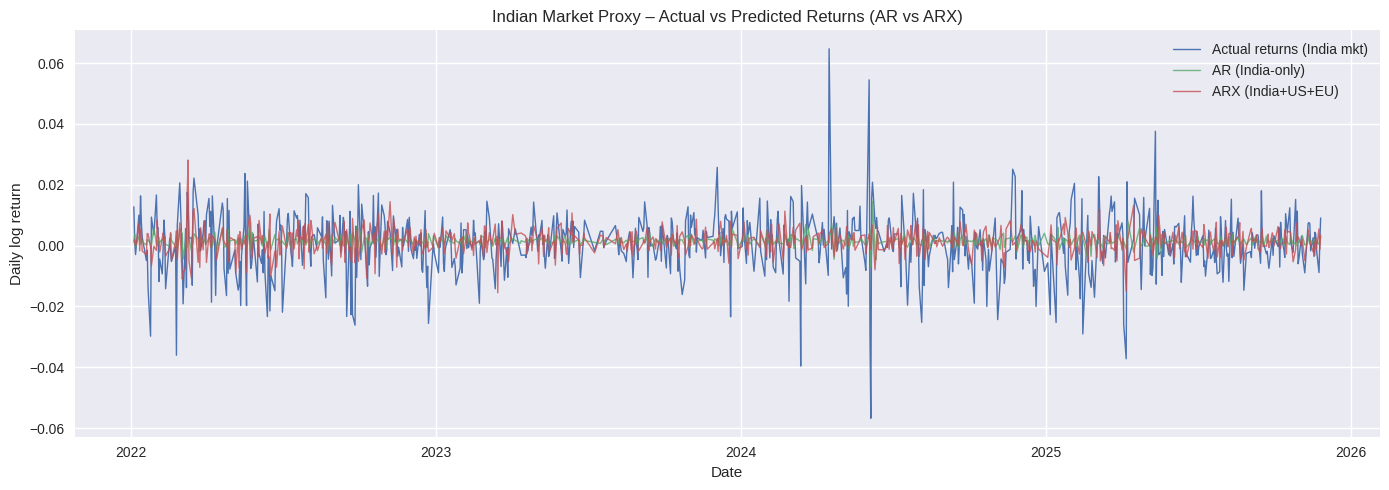

In [ ]:
# Extract series
y_test_mkt = metrics_mkt["y_test"]
y_pred_ar_mkt = metrics_mkt["y_pred_ar_test"]
y_pred_arx_mkt = metrics_mkt["y_pred_arx_test"]

fig, ax = plt.subplots(figsize=(14, 5))

ax.plot(y_test_mkt.index, y_test_mkt.values, label="Actual returns (India mkt)", linewidth=1)
ax.plot(y_test_mkt.index, y_pred_ar_mkt.values, label="AR (India-only)", linewidth=1, alpha=0.8)
ax.plot(y_test_mkt.index, y_pred_arx_mkt.values, label="ARX (India+US+EU)", linewidth=1, alpha=0.8)

ax.set_title("Indian Market Proxy – Actual vs Predicted Returns (AR vs ARX)")
ax.set_xlabel("Date")
ax.set_ylabel("Daily log return")
ax.legend()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.tight_layout()
plt.show()


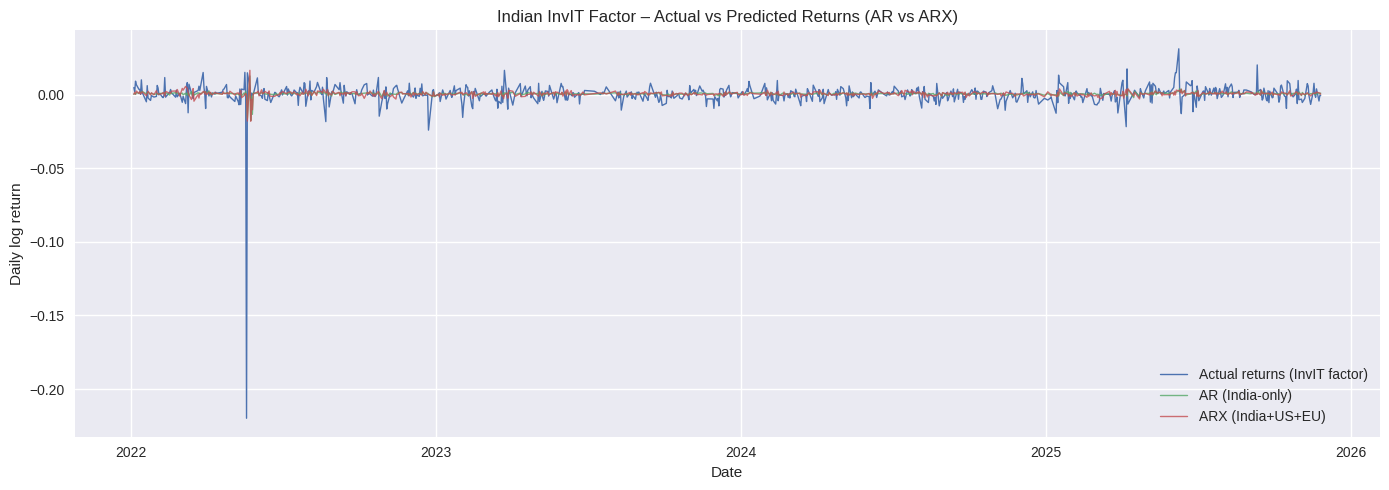

In [ ]:
y_test_inv = metrics_invits["y_test"]
y_pred_ar_inv = metrics_invits["y_pred_ar_test"]
y_pred_arx_inv = metrics_invits["y_pred_arx_test"]

fig, ax = plt.subplots(figsize=(14, 5))

ax.plot(y_test_inv.index, y_test_inv.values, label="Actual returns (InvIT factor)", linewidth=1)
ax.plot(y_test_inv.index, y_pred_ar_inv.values, label="AR (India-only)", linewidth=1, alpha=0.8)
ax.plot(y_test_inv.index, y_pred_arx_inv.values, label="ARX (India+US+EU)", linewidth=1, alpha=0.8)

ax.set_title("Indian InvIT Factor – Actual vs Predicted Returns (AR vs ARX)")
ax.set_xlabel("Date")
ax.set_ylabel("Daily log return")
ax.legend()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.tight_layout()
plt.show()


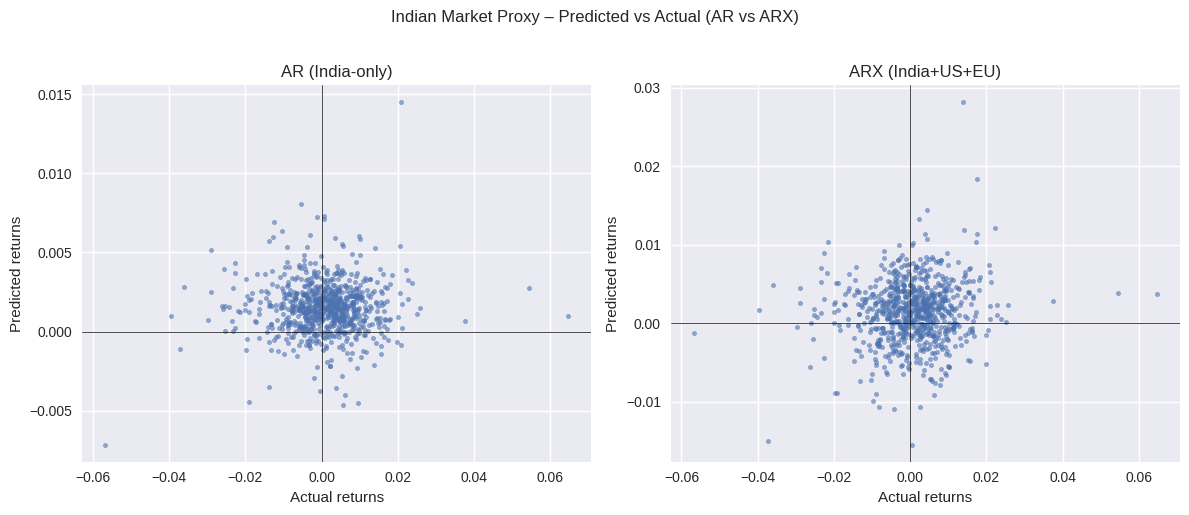

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# AR scatter
axes[0].scatter(y_test_mkt, y_pred_ar_mkt, s=10, alpha=0.6)
axes[0].axhline(0, color="black", linewidth=0.5)
axes[0].axvline(0, color="black", linewidth=0.5)
axes[0].set_title("AR (India-only)")
axes[0].set_xlabel("Actual returns")
axes[0].set_ylabel("Predicted returns")

# ARX scatter
axes[1].scatter(y_test_mkt, y_pred_arx_mkt, s=10, alpha=0.6)
axes[1].axhline(0, color="black", linewidth=0.5)
axes[1].axvline(0, color="black", linewidth=0.5)
axes[1].set_title("ARX (India+US+EU)")
axes[1].set_xlabel("Actual returns")
axes[1].set_ylabel("Predicted returns")

fig.suptitle("Indian Market Proxy – Predicted vs Actual (AR vs ARX)", y=1.02)
plt.tight_layout()
plt.show()


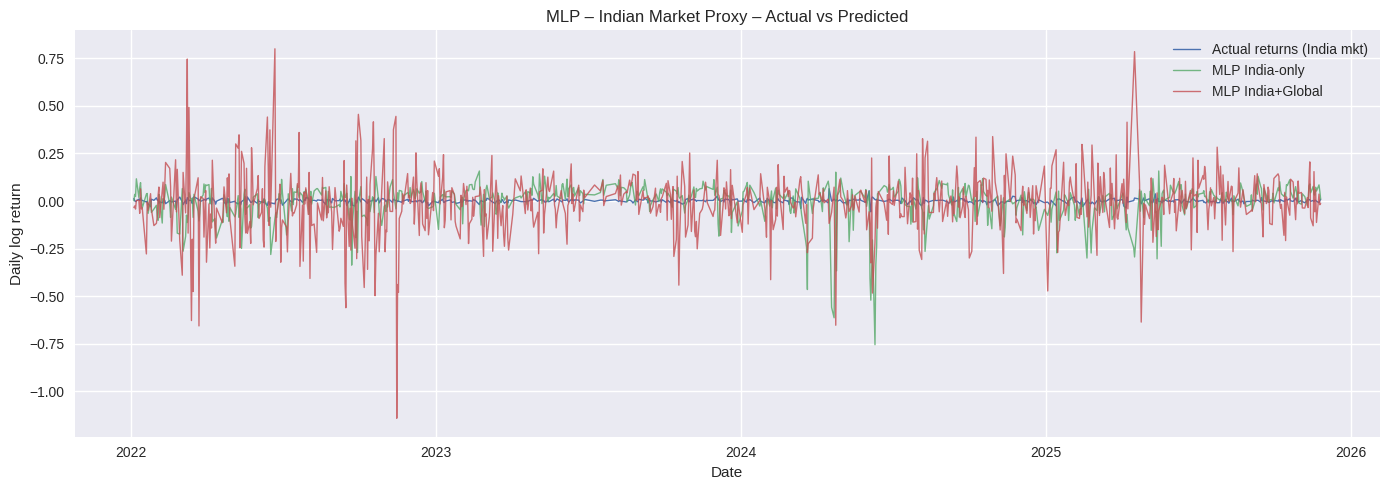

In [ ]:
# Only if mlp_mkt exists
y_test_mlp = mlp_mkt["y_test"]
y_pred_india_mlp = mlp_mkt["y_pred_india"]
y_pred_global_mlp = mlp_mkt["y_pred_global"]

fig, ax = plt.subplots(figsize=(14, 5))

ax.plot(y_test_mlp.index, y_test_mlp.values, label="Actual returns (India mkt)", linewidth=1)
ax.plot(y_test_mlp.index, y_pred_india_mlp, label="MLP India-only", linewidth=1, alpha=0.8)
ax.plot(y_test_mlp.index, y_pred_global_mlp, label="MLP India+Global", linewidth=1, alpha=0.8)

ax.set_title("MLP – Indian Market Proxy – Actual vs Predicted")
ax.set_xlabel("Date")
ax.set_ylabel("Daily log return")
ax.legend()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.tight_layout()
plt.show()


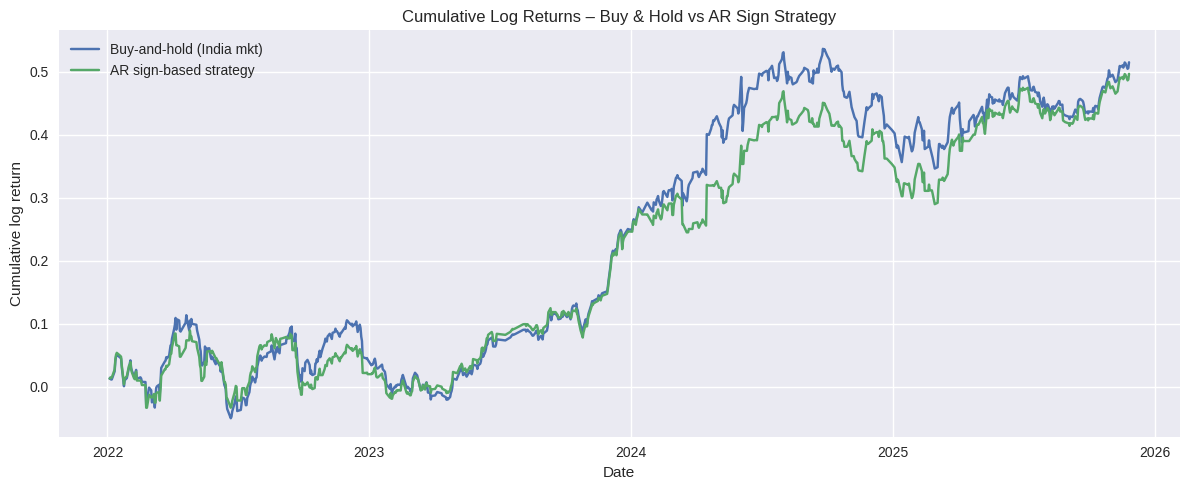

In [ ]:
# Strategy: long +1 when AR prediction > 0, else 0 (no short for simplicity)
signal_ar = (y_pred_ar_mkt > 0).astype(int)  # 1 or 0
strategy_ret_ar = signal_ar * y_test_mkt

cum_actual = y_test_mkt.cumsum()
cum_strategy_ar = strategy_ret_ar.cumsum()

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(cum_actual.index, cum_actual.values, label="Buy-and-hold (India mkt)")
ax.plot(cum_strategy_ar.index, cum_strategy_ar.values, label="AR sign-based strategy")

ax.set_title("Cumulative Log Returns – Buy & Hold vs AR Sign Strategy")
ax.set_xlabel("Date")
ax.set_ylabel("Cumulative log return")
ax.legend()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.tight_layout()
plt.show()


In [ ]:
# ============================================
# Build supervised data for MLP:
# 5-day ahead return prediction
# ============================================

HORIZON = 5   # predict cum return over next 5 days (you can try 10, 20 later)

def make_mlp_dataset(target_series, us_series, eu_series, p_lags=5, horizon=5):
    """
    target_series: Indian return series (market or InvIT factor)
    us_series: US market proxy return series
    eu_series: EU market proxy return series (can be NaN, we'll just skip its cols)
    """

    df = pd.DataFrame(index=target_series.index)

    # ----- target: sum of next HORIZON daily returns -----
    y = None
    for k in range(1, horizon + 1):
        shifted = target_series.shift(-k)
        y = shifted if y is None else y + shifted
    df["y"] = y

    # ----- India lags -----
    for lag in range(1, p_lags + 1):
        df[f"india_l{lag}"] = target_series.shift(lag)

    # ----- US lags -----
    if us_series is not None:
        for lag in range(1, p_lags + 1):
            df[f"us_l{lag}"] = us_series.shift(lag)

    # ----- EU lags -----
    if (eu_series is not None) and (not eu_series.isna().all()):
        for lag in range(1, p_lags + 1):
            df[f"eu_l{lag}"] = eu_series.shift(lag)

    df = df.dropna()
    return df

# Dataset for Indian market proxy
mlp_mkt_df = make_mlp_dataset(
    target_series=ret_india_mkt,
    us_series=ret_us_mkt,
    eu_series=ret_eu_mkt,
    p_lags=P_LAGS,
    horizon=HORIZON
)

# Dataset for InvIT factor
mlp_invits_df = make_mlp_dataset(
    target_series=ret_invits_india,
    us_series=ret_us_mkt,
    eu_series=ret_eu_mkt,
    p_lags=P_LAGS,
    horizon=HORIZON
)

mlp_mkt_df.head()


,y,india_l1,india_l2,india_l3,india_l4,india_l5,us_l1,us_l2,us_l3,us_l4,us_l5,eu_l1,eu_l2,eu_l3,eu_l4,eu_l5
Date,,,,,,,,,,,,,,,,
2021-06-02,0.019983,0.009592,0.000593,-0.002321,0.012656,0.004682,0.000276,0.006379,-0.009170,-0.009087,0.000548,0.002469,0.003058,-0.010948,0.000883,-0.000442
2021-06-03,0.035463,0.011987,0.009592,0.000593,-0.002321,0.012656,-0.006299,0.000276,0.006379,-0.009170,-0.009087,0.001439,0.002469,0.003058,-0.010948,0.000883
2021-06-04,0.012252,-0.010445,0.011987,0.009592,0.000593,-0.002321,0.003017,-0.006299,0.000276,0.006379,-0.009170,-0.007067,0.001439,0.002469,0.003058,-0.010948
2021-06-07,-0.004536,0.023578,-0.010445,0.011987,0.009592,0.000593,0.001369,0.003017,-0.006299,0.000276,0.006379,0.008216,-0.007067,0.001439,0.002469,0.003058
2021-06-08,-0.004402,0.017111,0.023578,-0.010445,0.011987,0.009592,0.001640,0.001369,0.003017,-0.006299,0.000276,0.004583,0.008216,-0.007067,0.001439,0.002469


In [ ]:
def ts_split_xy(df, split_date="2022-01-01"):
    df = df.sort_index()
    train = df[df.index < split_date].copy()
    test  = df[df.index >= split_date].copy()

    y_train = train["y"].values
    X_train = train.drop(columns=["y"]).values

    y_test = test["y"].values
    X_test = test.drop(columns=["y"]).values

    return X_train, y_train, X_test, y_test, train.index, test.index

SPLIT_DATE = "2022-01-01"


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def run_mlp_for_df(df, split_date="2022-01-01",
                   hidden_layer_sizes=(16, 16),
                   alpha=1e-3, max_iter=2000, random_state=42):

    # figure out which columns are India / US / EU
    feature_cols = [c for c in df.columns if c != "y"]
    india_cols = [c for c in feature_cols if c.startswith("india_")]
    us_cols    = [c for c in feature_cols if c.startswith("us_")]
    eu_cols    = [c for c in feature_cols if c.startswith("eu_")]

    # full split
    X_train_full, y_train, X_test_full, y_test, idx_train, idx_test = ts_split_xy(df, split_date)

    # Build matrices for India-only and Global
    # (use indices into df.columns so we can reuse code)
    col_to_pos = {c: i for i, c in enumerate(feature_cols)}

    india_pos = [col_to_pos[c] for c in india_cols]
    global_pos = [col_to_pos[c] for c in (india_cols + us_cols + eu_cols)]

    X_train_india = X_train_full[:, india_pos]
    X_test_india  = X_test_full[:, india_pos]

    X_train_global = X_train_full[:, global_pos]
    X_test_global  = X_test_full[:, global_pos]

    # ---- scale X and y ----
    scaler_X_india = StandardScaler().fit(X_train_india)
    scaler_X_global = StandardScaler().fit(X_train_global)
    scaler_y = StandardScaler().fit(y_train.reshape(-1, 1))

    X_train_india_s = scaler_X_india.transform(X_train_india)
    X_test_india_s  = scaler_X_india.transform(X_test_india)

    X_train_global_s = scaler_X_global.transform(X_train_global)
    X_test_global_s  = scaler_X_global.transform(X_test_global)

    y_train_s = scaler_y.transform(y_train.reshape(-1, 1)).ravel()

    # ---- MLP India-only ----
    mlp_india = MLPRegressor(
        hidden_layer_sizes=hidden_layer_sizes,
        activation="relu",
        solver="adam",
        alpha=alpha,
        max_iter=max_iter,
        random_state=random_state,
        early_stopping=True,
        validation_fraction=0.2,
        n_iter_no_change=50
    )
    mlp_india.fit(X_train_india_s, y_train_s)

    y_pred_india_s = mlp_india.predict(X_test_india_s)
    y_pred_india = scaler_y.inverse_transform(y_pred_india_s.reshape(-1, 1)).ravel()

    rmse_india = np.sqrt(mean_squared_error(y_test, y_pred_india))
    r2_india   = r2_score(y_test, y_pred_india)
    dir_acc_india = np.mean(np.sign(y_pred_india) == np.sign(y_test))

    # ---- MLP India+Global ----
    mlp_global = MLPRegressor(
        hidden_layer_sizes=hidden_layer_sizes,
        activation="relu",
        solver="adam",
        alpha=alpha,
        max_iter=max_iter,
        random_state=random_state,
        early_stopping=True,
        validation_fraction=0.2,
        n_iter_no_change=50
    )
    mlp_global.fit(X_train_global_s, y_train_s)

    y_pred_global_s = mlp_global.predict(X_test_global_s)
    y_pred_global = scaler_y.inverse_transform(y_pred_global_s.reshape(-1, 1)).ravel()

    rmse_global = np.sqrt(mean_squared_error(y_test, y_pred_global))
    r2_global   = r2_score(y_test, y_pred_global)
    dir_acc_global = np.mean(np.sign(y_pred_global) == np.sign(y_test))

    metrics = {
        "rmse_india": rmse_india,
        "r2_india": r2_india,
        "dir_acc_india": dir_acc_india,
        "rmse_global": rmse_global,
        "r2_global": r2_global,
        "dir_acc_global": dir_acc_global,
        "y_test": y_test,
        "y_pred_india": y_pred_india,
        "y_pred_global": y_pred_global,
        "idx_test": idx_test,
        "mlp_india": mlp_india,
        "mlp_global": mlp_global,
    }

    return metrics

# ===== Run for Indian market proxy =====
mlp5_mkt = run_mlp_for_df(mlp_mkt_df, split_date=SPLIT_DATE)
print("=== 5-day MLP – Indian Market Proxy ===")
print(mlp5_mkt)

# ===== Run for InvIT factor =====
mlp5_invits = run_mlp_for_df(mlp_invits_df, split_date=SPLIT_DATE)
print("\n=== 5-day MLP – Indian InvIT Factor ===")
print(mlp5_invits)


=== 5-day MLP – Indian Market Proxy ===
{'rmse_india': np.float64(0.025253801034785597), 'r2_india': -0.23701850299057314, 'dir_acc_india': np.float64(0.5526315789473685), 'rmse_global': np.float64(0.024630492476227644), 'r2_global': -0.17670846489765757, 'dir_acc_global': np.float64(0.5526315789473685), 'y_test': array([ 1.14711552e-02,  2.63033565e-02,  3.66190468e-02,  3.93002471e-02,
        2.44375595e-02,  2.01230102e-02, -1.01390419e-02, -4.72802149e-02,
       -4.06830122e-02, -3.22654274e-02, -1.41236766e-02,  5.43496028e-03,
        4.10522626e-02,  1.98763077e-02,  1.19386652e-02, -1.39985594e-02,
       -2.13572049e-02, -1.88178735e-02, -3.32987979e-03, -1.30979548e-02,
       -1.44112371e-03, -1.65962206e-03, -1.52755848e-02, -1.92376522e-02,
       -4.11048264e-02, -3.69271075e-02, -1.43551642e-02, -1.34994367e-02,
       -3.23553457e-02,  9.29255016e-03, -1.10725022e-02, -1.42319676e-02,
        3.88346855e-03,  2.54832165e-02,  2.24292734e-02,  2.32441898e-02,
        2

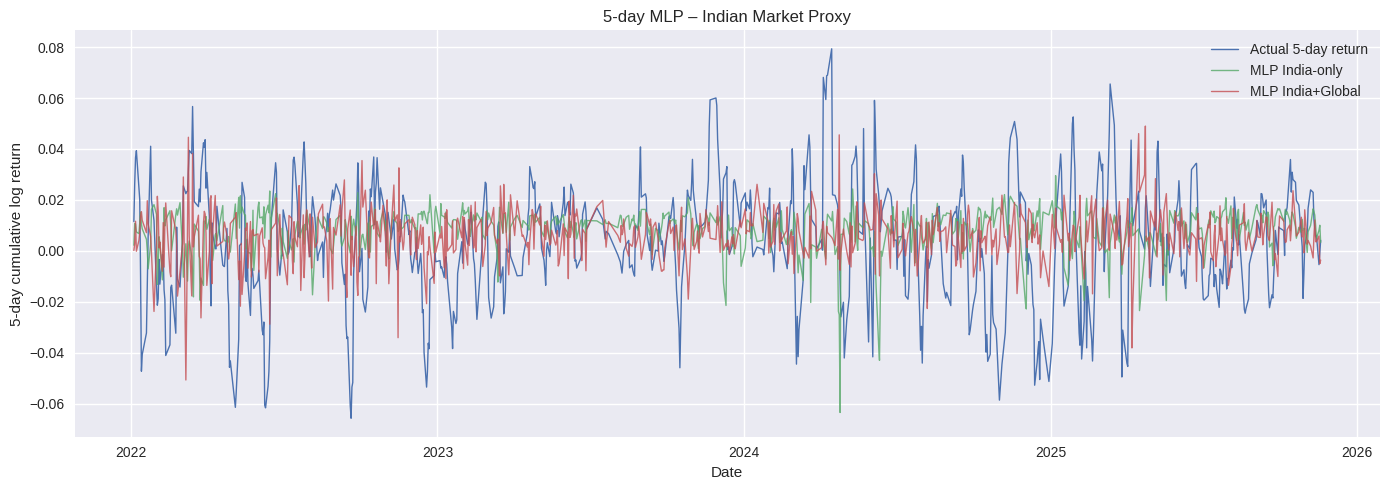

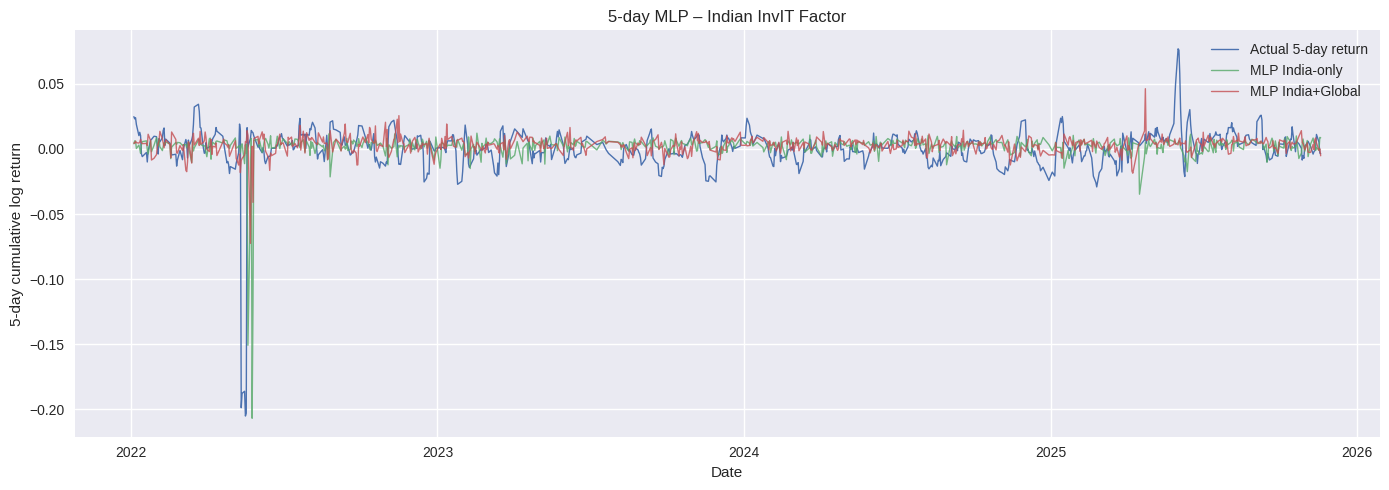

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_mlp_results(metrics, title):
    idx_test = metrics["idx_test"]
    y_test = metrics["y_test"]
    y_pred_india = metrics["y_pred_india"]
    y_pred_global = metrics["y_pred_global"]

    fig, ax = plt.subplots(figsize=(14, 5))
    ax.plot(idx_test, y_test, label="Actual 5-day return", linewidth=1)
    ax.plot(idx_test, y_pred_india, label="MLP India-only", linewidth=1, alpha=0.8)
    ax.plot(idx_test, y_pred_global, label="MLP India+Global", linewidth=1, alpha=0.8)

    ax.set_title(title)
    ax.set_xlabel("Date")
    ax.set_ylabel("5-day cumulative log return")
    ax.legend()
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.tight_layout()
    plt.show()

plot_mlp_results(mlp5_mkt, "5-day MLP – Indian Market Proxy")
plot_mlp_results(mlp5_invits, "5-day MLP – Indian InvIT Factor")


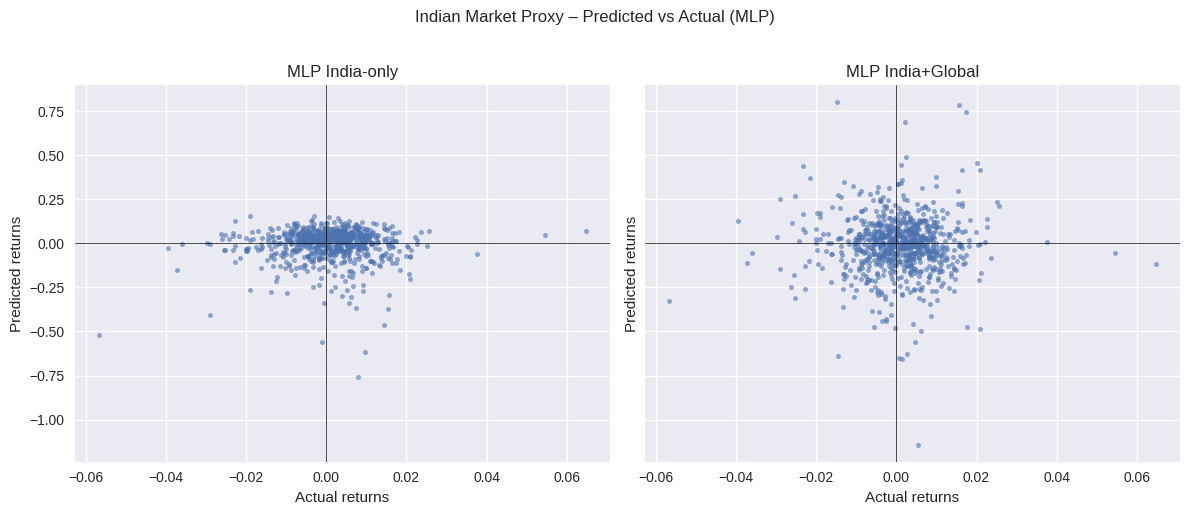

In [ ]:
y_test_mlp = mlp_mkt["y_test"]
y_pred_india_mlp = mlp_mkt["y_pred_india"]
y_pred_global_mlp = mlp_mkt["y_pred_global"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

# MLP India-only scatter
axes[0].scatter(y_test_mlp, y_pred_india_mlp, s=10, alpha=0.6)
axes[0].axhline(0, color="black", linewidth=0.5)
axes[0].axvline(0, color="black", linewidth=0.5)
axes[0].set_title("MLP India-only")
axes[0].set_xlabel("Actual returns")
axes[0].set_ylabel("Predicted returns")

# MLP India+Global scatter
axes[1].scatter(y_test_mlp, y_pred_global_mlp, s=10, alpha=0.6)
axes[1].axhline(0, color="black", linewidth=0.5)
axes[1].axvline(0, color="black", linewidth=0.5)
axes[1].set_title("MLP India+Global")
axes[1].set_xlabel("Actual returns")
axes[1].set_ylabel("Predicted returns")

fig.suptitle("Indian Market Proxy – Predicted vs Actual (MLP)", y=1.02)
plt.tight_layout()
plt.show()

LSTM

In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping



In [ ]:
# Assumes you already have:
# ret_india_mkt, ret_us_mkt, ret_eu_mkt (Series with DateTimeIndex)

def build_feature_df(ret_india_mkt, ret_us_mkt, ret_eu_mkt):
    df = pd.DataFrame(index=ret_india_mkt.index)

    # Helper to add features for one market
    def add_feats(base_df, series, prefix):
        base_df[f"{prefix}_ret"] = series
        base_df[f"{prefix}_ma5"] = series.rolling(5).mean()
        base_df[f"{prefix}_ma10"] = series.rolling(10).mean()
        base_df[f"{prefix}_ma20"] = series.rolling(20).mean()
        base_df[f"{prefix}_vol5"] = series.rolling(5).std()
        base_df[f"{prefix}_vol10"] = series.rolling(10).std()
        base_df[f"{prefix}_vol20"] = series.rolling(20).std()
        return base_df

    # India always present
    df = add_feats(df, ret_india_mkt, "IND")

    # US
    if ret_us_mkt is not None:
        df = add_feats(df, ret_us_mkt.reindex(df.index), "US")

    # EU (only if not all NaN)
    if (ret_eu_mkt is not None) and (not ret_eu_mkt.isna().all()):
        df = add_feats(df, ret_eu_mkt.reindex(df.index), "EU")

    df = df.dropna()
    return df

features_df = build_feature_df(ret_india_mkt, ret_us_mkt, ret_eu_mkt)
features_df.tail()


,IND_ret,IND_ma5,IND_ma10,IND_ma20,IND_vol5,IND_vol10,IND_vol20,US_ret,US_ma5,US_ma10,...,US_vol5,US_vol10,US_vol20,EU_ret,EU_ma5,EU_ma10,EU_ma20,EU_vol5,EU_vol10,EU_vol20
Date,,,,,,,,,,,,,,,,,,,,,
2025-11-20,0.003829,0.001106,0.002221,0.002592,0.003535,0.005395,0.006364,-0.008434,-0.004991,-0.002432,...,0.004151,0.007614,0.007619,-0.013769,-0.009477,-0.002146,-0.002313,0.003898,0.009573,0.007402
2025-11-21,-0.001221,0.001202,0.002994,0.001909,0.003445,0.003986,0.005972,0.013110,-0.002435,-0.001887,...,0.009160,0.008553,0.007429,0.015160,-0.004921,-0.001119,-0.001771,0.011838,0.010875,0.008261
2025-11-24,-0.008844,-0.001086,0.001752,0.001409,0.005483,0.005451,0.006439,0.010347,0.001565,-0.001233,...,0.009578,0.009258,0.007917,-0.002532,-0.002969,-0.002553,-0.001601,0.011101,0.009881,0.008205
2025-11-25,0.001283,-0.000117,0.001150,0.001587,0.005362,0.005090,0.006381,0.013663,0.004763,0.000057,...,0.010572,0.010396,0.008300,0.016968,0.002382,-0.001913,-0.000826,0.013235,0.010972,0.009184
2025-11-26,0.009072,0.000824,0.001299,0.001282,0.006613,0.005315,0.005816,0.011886,0.008114,0.000715,...,0.009338,0.010958,0.008791,0.009427,0.005051,-0.001556,-0.000600,0.012991,0.011306,0.009386


In [ ]:
HORIZON = 5   # predict next 5-day cumulative return
SEQ_LEN = 60  # lookback window length for LSTM

def make_target_series(ret_india_mkt, horizon=5):
    y = None
    for k in range(1, horizon + 1):
        shifted = ret_india_mkt.shift(-k)
        y = shifted if y is None else y + shifted
    return y.rename("y")

y_series = make_target_series(ret_india_mkt, HORIZON)

# Align y with feature dataframe and drop NaNs
data_all = features_df.join(y_series, how="inner").dropna()

data_all.tail()


,IND_ret,IND_ma5,IND_ma10,IND_ma20,IND_vol5,IND_vol10,IND_vol20,US_ret,US_ma5,US_ma10,...,US_vol10,US_vol20,EU_ret,EU_ma5,EU_ma10,EU_ma20,EU_vol5,EU_vol10,EU_vol20,y
Date,,,,,,,,,,,,,,,,,,,,,
2025-11-13,0.007168,0.003337,0.001831,0.003166,0.007062,0.006832,0.006682,-0.016897,0.000127,-0.002674,...,0.007909,0.008696,-0.007197,0.005184,-0.000107,0.001069,0.007529,0.007827,0.006206,0.005528
2025-11-14,-0.001702,0.004787,0.000525,0.003150,0.003982,0.006006,0.006694,0.000327,-0.001340,-0.002025,...,0.007857,0.008283,-0.007620,0.002683,-0.000328,0.000342,0.009477,0.008022,0.006335,0.006008
2025-11-17,0.002597,0.004591,0.001380,0.003473,0.004079,0.005575,0.006489,-0.009649,-0.004031,-0.001670,...,0.007359,0.008033,-0.012288,-0.002137,-0.001087,-0.000466,0.009798,0.008802,0.006869,-0.005432
2025-11-18,-0.003564,0.002417,0.001437,0.002770,0.005052,0.005514,0.006449,-0.002330,-0.004649,-0.001884,...,0.007343,0.007832,-0.009789,-0.006209,-0.001618,-0.001068,0.007039,0.009182,0.007141,-0.000585
2025-11-19,0.004368,0.001773,0.001567,0.002619,0.004390,0.005572,0.006370,-0.004871,-0.006684,-0.002123,...,0.007403,0.007459,-0.003917,-0.008162,-0.001848,-0.001612,0.003119,0.009211,0.006908,0.004119


In [ ]:
def build_sequence_data(df, seq_len=60):
    """
    df: DataFrame with features + 'y' column.
    Returns:
      X: (N, seq_len, D) numpy array
      y: (N,) numpy array
      idx: Date index for each sample (corresponds to last day in the sequence)
    """
    feature_cols = [c for c in df.columns if c != "y"]
    X_list, y_list, idx_list = [], [], []

    df_feat = df[feature_cols].values
    df_y = df["y"].values
    dates = df.index

    for end_idx in range(seq_len - 1, len(df)):
        start_idx = end_idx - seq_len + 1
        X_seq = df_feat[start_idx:end_idx + 1]   # shape (seq_len, D)
        y_val = df_y[end_idx]                   # target aligned with last day
        date_val = dates[end_idx]

        X_list.append(X_seq)
        y_list.append(y_val)
        idx_list.append(date_val)

    X = np.array(X_list)  # (N, seq_len, D)
    y = np.array(y_list)  # (N,)
    idx = pd.DatetimeIndex(idx_list)

    return X, y, idx, feature_cols

X_all, y_all, idx_all, feature_cols = build_sequence_data(data_all, SEQ_LEN)
X_all.shape, y_all.shape, idx_all[-5:]


((856, 60, 21),
 (856,),
 DatetimeIndex(['2025-11-13', '2025-11-14', '2025-11-17', '2025-11-18',
                '2025-11-19'],
               dtype='datetime64[ns]', freq=None))

In [ ]:
SPLIT_DATE = "2022-01-01"  # ensure same as before

# Identify which features belong to India vs US/EU
india_cols = [c for c in feature_cols if c.startswith("IND_")]
global_cols = feature_cols  # India + US (+ EU) = all columns

# Map col-name → position in feature dimension
col_to_pos = {c: i for i, c in enumerate(feature_cols)}

india_pos = np.array([col_to_pos[c] for c in india_cols])
global_pos = np.array([col_to_pos[c] for c in global_cols])

# Train/test split based on idx_all
train_mask = idx_all < SPLIT_DATE
test_mask  = idx_all >= SPLIT_DATE

X_train_all = X_all[train_mask]
y_train = y_all[train_mask]
X_test_all  = X_all[test_mask]
y_test = y_all[test_mask]
idx_test = idx_all[test_mask]

X_train_all.shape, X_test_all.shape


((58, 60, 21), (798, 60, 21))

In [ ]:
# Helper to select feature subsets
def select_features(X, feature_positions):
    # X: (N, T, D); feature_positions: array of indices to keep in last dimension
    return X[:, :, feature_positions]

X_train_india = select_features(X_train_all, india_pos)
X_test_india  = select_features(X_test_all, india_pos)

X_train_global = select_features(X_train_all, global_pos)
X_test_global  = select_features(X_test_all, global_pos)

X_train_india.shape, X_train_global.shape


((58, 60, 7), (58, 60, 21))

In [ ]:
# Scale X by flattening time dimension, scaling, then reshaping back
def fit_transform_sequences(X_train, X_test):
    N_train, T, D = X_train.shape
    N_test = X_test.shape[0]

    scaler_X = StandardScaler()
    X_train_2d = X_train.reshape(N_train, -1)
    X_test_2d  = X_test.reshape(N_test, -1)

    X_train_scaled = scaler_X.fit_transform(X_train_2d).reshape(N_train, T, D)
    X_test_scaled  = scaler_X.transform(X_test_2d).reshape(N_test, T, D)

    return X_train_scaled, X_test_scaled, scaler_X

# Scale y
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

# India-only sequences
X_train_india_s, X_test_india_s, scaler_X_india = fit_transform_sequences(X_train_india, X_test_india)

# Global sequences
X_train_global_s, X_test_global_s, scaler_X_global = fit_transform_sequences(X_train_global, X_test_global)


In [ ]:
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(32, input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer="adam", loss="mse")
    return model

BATCH_SIZE = 32
EPOCHS = 100

# ---- India-only LSTM ----
model_india = build_lstm_model(input_shape=X_train_india_s.shape[1:])
es = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

history_india = model_india.fit(
    X_train_india_s, y_train_scaled,
    validation_split=0.2,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[es],
    verbose=1
)

# ---- Global LSTM (India + US + EU) ----
model_global = build_lstm_model(input_shape=X_train_global_s.shape[1:])

history_global = model_global.fit(
    X_train_global_s, y_train_scaled,
    validation_split=0.2,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[es],
    verbose=1
)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 699ms/step - loss: 0.7789 - val_loss: 1.4389
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.7193 - val_loss: 1.4000
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.7299 - val_loss: 1.3625
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.6651 - val_loss: 1.3264
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.6454 - val_loss: 1.2906
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.6594 - val_loss: 1.2578
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.5447 - val_loss: 1.2274
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.5909 - val_loss: 1.2001
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.5558 - val_loss: 1.1795
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.5618 - val_loss: 1.1606
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.5177 - val_loss: 1.1431
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.4988 - val_l

In [ ]:
# Predict (scaled), then inverse-transform to original y scale
y_pred_india_scaled = model_india.predict(X_test_india_s).ravel()
y_pred_global_scaled = model_global.predict(X_test_global_s).ravel()

y_pred_india = scaler_y.inverse_transform(y_pred_india_scaled.reshape(-1, 1)).ravel()
y_pred_global = scaler_y.inverse_transform(y_pred_global_scaled.reshape(-1, 1)).ravel()

# Metrics
rmse_india = np.sqrt(mean_squared_error(y_test, y_pred_india))
rmse_global = np.sqrt(mean_squared_error(y_test, y_pred_global))

r2_india = r2_score(y_test, y_pred_india)
r2_global = r2_score(y_test, y_pred_global)

dir_acc_india = np.mean(np.sign(y_pred_india) == np.sign(y_test))
dir_acc_global = np.mean(np.sign(y_pred_global) == np.sign(y_test))

lstm_metrics = {
    "rmse_india": rmse_india,
    "r2_india": r2_india,
    "dir_acc_india": dir_acc_india,
    "rmse_global": rmse_global,
    "r2_global": r2_global,
    "dir_acc_global": dir_acc_global,
}

print("=== LSTM – 5-day ahead Indian infra (sequence model) ===")
print(lstm_metrics)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
=== LSTM – 5-day ahead Indian infra (sequence model) ===
{'rmse_india': np.float64(0.04273089611639559), 'r2_india': -2.541658543274997, 'dir_acc_india': np.float64(0.5200501253132832), 'rmse_global': np.float64(0.03298979392020057), 'r2_global': -1.110969176485122, 'dir_acc_global': np.float64(0.5162907268170426)}


LSTM 2

In [ ]:
# -------------------------------------------------
# 1) Build daily feature DataFrame (India + US + EU)
# -------------------------------------------------

def build_feature_df(ret_india_mkt, ret_us_mkt, ret_eu_mkt):
    df = pd.DataFrame(index=ret_india_mkt.index)

    def add_feats(base_df, series, prefix):
        series = series.reindex(base_df.index)
        base_df[f"{prefix}_ret"]   = series
        base_df[f"{prefix}_ma5"]   = series.rolling(5).mean()
        base_df[f"{prefix}_ma10"]  = series.rolling(10).mean()
        base_df[f"{prefix}_ma20"]  = series.rolling(20).mean()
        base_df[f"{prefix}_vol5"]  = series.rolling(5).std()
        base_df[f"{prefix}_vol10"] = series.rolling(10).std()
        base_df[f"{prefix}_vol20"] = series.rolling(20).std()
        return base_df

    # India (always)
    df = add_feats(df, ret_india_mkt, "IND")

    # US
    if ret_us_mkt is not None:
        df = add_feats(df, ret_us_mkt, "US")

    # EU (only if not all NaN)
    if (ret_eu_mkt is not None) and (not ret_eu_mkt.isna().all()):
        df = add_feats(df, ret_eu_mkt, "EU")

    df = df.dropna()
    return df

features_df = build_feature_df(ret_india_mkt, ret_us_mkt, ret_eu_mkt)


# -------------------------------------------------
# 2) Build 5-day cumulative return target with clipping
# -------------------------------------------------

HORIZON = 5   # predict next 5-day cumulative return

def make_clipped_target(ret_india_mkt, horizon=5, clip_q=(0.01, 0.99)):
    # clip extreme returns to reduce outlier impact
    r_clipped = ret_india_mkt.clip(
        lower=ret_india_mkt.quantile(clip_q[0]),
        upper=ret_india_mkt.quantile(clip_q[1])
    )
    y = None
    for k in range(1, horizon + 1):
        shifted = r_clipped.shift(-k)
        y = shifted if y is None else y + shifted
    return y.rename("y")

y_series = make_clipped_target(ret_india_mkt, HORIZON)

# Align and drop NaNs
data_all = features_df.join(y_series, how="inner").dropna()
data_all.tail()


,IND_ret,IND_ma5,IND_ma10,IND_ma20,IND_vol5,IND_vol10,IND_vol20,US_ret,US_ma5,US_ma10,...,US_vol10,US_vol20,EU_ret,EU_ma5,EU_ma10,EU_ma20,EU_vol5,EU_vol10,EU_vol20,y
Date,,,,,,,,,,,,,,,,,,,,,
2025-11-13,0.007168,0.003337,0.001831,0.003166,0.007062,0.006832,0.006682,-0.016897,0.000127,-0.002674,...,0.007909,0.008696,-0.007197,0.005184,-0.000107,0.001069,0.007529,0.007827,0.006206,0.005528
2025-11-14,-0.001702,0.004787,0.000525,0.003150,0.003982,0.006006,0.006694,0.000327,-0.001340,-0.002025,...,0.007857,0.008283,-0.007620,0.002683,-0.000328,0.000342,0.009477,0.008022,0.006335,0.006008
2025-11-17,0.002597,0.004591,0.001380,0.003473,0.004079,0.005575,0.006489,-0.009649,-0.004031,-0.001670,...,0.007359,0.008033,-0.012288,-0.002137,-0.001087,-0.000466,0.009798,0.008802,0.006869,-0.005432
2025-11-18,-0.003564,0.002417,0.001437,0.002770,0.005052,0.005514,0.006449,-0.002330,-0.004649,-0.001884,...,0.007343,0.007832,-0.009789,-0.006209,-0.001618,-0.001068,0.007039,0.009182,0.007141,-0.000585
2025-11-19,0.004368,0.001773,0.001567,0.002619,0.004390,0.005572,0.006370,-0.004871,-0.006684,-0.002123,...,0.007403,0.007459,-0.003917,-0.008162,-0.001848,-0.001612,0.003119,0.009211,0.006908,0.004119


In [ ]:
SEQ_LEN = 30  # use 30-day lookback for LSTM

def build_sequence_data(df, seq_len=30):
    feature_cols = [c for c in df.columns if c != "y"]
    X_list, y_list, idx_list = [], [], []

    df_feat = df[feature_cols].values
    df_y = df["y"].values
    dates = df.index

    for end_idx in range(seq_len - 1, len(df)):
        start_idx = end_idx - seq_len + 1
        X_seq = df_feat[start_idx:end_idx + 1]   # (seq_len, D)
        y_val = df_y[end_idx]
        date_val = dates[end_idx]

        X_list.append(X_seq)
        y_list.append(y_val)
        idx_list.append(date_val)

    X = np.array(X_list)  # (N, seq_len, D)
    y = np.array(y_list)  # (N,)
    idx = pd.DatetimeIndex(idx_list)
    return X, y, idx, feature_cols

X_all, y_all, idx_all, feature_cols = build_sequence_data(data_all, SEQ_LEN)
print("X_all shape:", X_all.shape, "y_all shape:", y_all.shape)

# -------------------------------
# Train/test split based on date
# -------------------------------
SPLIT_DATE = "2022-01-01"  # make sure this matches earlier

train_mask = idx_all < SPLIT_DATE
test_mask  = idx_all >= SPLIT_DATE

X_train_all = X_all[train_mask]
y_train     = y_all[train_mask]
X_test_all  = X_all[test_mask]
y_test      = y_all[test_mask]
idx_test    = idx_all[test_mask]

print("Train samples:", X_train_all.shape[0], "Test samples:", X_test_all.shape[0])

# ---------------------------------------------
# Feature indices: India-only vs India+US+EU
# ---------------------------------------------
india_cols = [c for c in feature_cols if c.startswith("IND_")]
global_cols = feature_cols  # all features

col_to_pos = {c: i for i, c in enumerate(feature_cols)}
india_pos  = np.array([col_to_pos[c] for c in india_cols])
global_pos = np.array([col_to_pos[c] for c in global_cols])

def select_features(X, feature_positions):
    return X[:, :, feature_positions]

X_train_india = select_features(X_train_all, india_pos)
X_test_india  = select_features(X_test_all, india_pos)

X_train_global = select_features(X_train_all, global_pos)
X_test_global  = select_features(X_test_all, global_pos)

print("India-only shape:", X_train_india.shape, "Global shape:", X_train_global.shape)


X_all shape: (886, 30, 21) y_all shape: (886,)
Train samples: 88 Test samples: 798
India-only shape: (88, 30, 7) Global shape: (88, 30, 21)


In [ ]:
# ---------------------------------------
# Scale X sequences by flattening then reshaping
# ---------------------------------------
def fit_transform_sequences(X_train, X_test):
    N_train, T, D = X_train.shape
    N_test = X_test.shape[0]

    scaler_X = StandardScaler()
    X_train_2d = X_train.reshape(N_train, -1)
    X_test_2d  = X_test.reshape(N_test, -1)

    X_train_scaled = scaler_X.fit_transform(X_train_2d).reshape(N_train, T, D)
    X_test_scaled  = scaler_X.transform(X_test_2d).reshape(N_test, T, D)

    return X_train_scaled, X_test_scaled, scaler_X

# Regression target scaling
scaler_y = StandardScaler()
y_train_reg_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

# Classification target: sign of 5-day return
y_train_cls = (y_train > 0).astype(int)
y_test_cls  = (y_test > 0).astype(int)

# India-only sequences
X_train_india_s, X_test_india_s, scaler_X_india = fit_transform_sequences(X_train_india, X_test_india)

# Global sequences
X_train_global_s, X_test_global_s, scaler_X_global = fit_transform_sequences(X_train_global, X_test_global)


In [ ]:
# ---------------------------------------
# Regression LSTM (smaller + dropout)
# ---------------------------------------
def build_lstm_regressor(input_shape):
    model = Sequential()
    model.add(LSTM(16, input_shape=input_shape, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1))
    model.compile(optimizer="adam", loss="mse")
    return model

BATCH_SIZE = 32
EPOCHS = 100
es = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True, verbose=1)

# ---- India-only LSTM (regression) ----
model_india_reg = build_lstm_regressor(X_train_india_s.shape[1:])
history_india_reg = model_india_reg.fit(
    X_train_india_s, y_train_reg_scaled,
    validation_split=0.2,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[es],
    verbose=1
)

# ---- Global LSTM (regression) ----
model_global_reg = build_lstm_regressor(X_train_global_s.shape[1:])
history_global_reg = model_global_reg.fit(
    X_train_global_s, y_train_reg_scaled,
    validation_split=0.2,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[es],
    verbose=1
)

# -----------------------
# Evaluate regression
# -----------------------
y_pred_india_reg_scaled  = model_india_reg.predict(X_test_india_s).ravel()
y_pred_global_reg_scaled = model_global_reg.predict(X_test_global_s).ravel()

y_pred_india_reg  = scaler_y.inverse_transform(y_pred_india_reg_scaled.reshape(-1, 1)).ravel()
y_pred_global_reg = scaler_y.inverse_transform(y_pred_global_reg_scaled.reshape(-1, 1)).ravel()

rmse_india_reg  = np.sqrt(mean_squared_error(y_test, y_pred_india_reg))
rmse_global_reg = np.sqrt(mean_squared_error(y_test, y_pred_global_reg))

r2_india_reg  = r2_score(y_test, y_pred_india_reg)
r2_global_reg = r2_score(y_test, y_pred_global_reg)

dir_acc_india_reg  = np.mean(np.sign(y_pred_india_reg) == np.sign(y_test))
dir_acc_global_reg = np.mean(np.sign(y_pred_global_reg) == np.sign(y_test))

lstm_reg_metrics = {
    "rmse_india": rmse_india_reg,
    "r2_india": r2_india_reg,
    "dir_acc_india": dir_acc_india_reg,
    "rmse_global": rmse_global_reg,
    "r2_global": r2_global_reg,
    "dir_acc_global": dir_acc_global_reg,
}

print("=== LSTM REGRESSION – 5-day ahead Indian infra ===")
print(lstm_reg_metrics)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 304ms/step - loss: 1.1108 - val_loss: 2.1814
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 1.0308 - val_loss: 2.1417
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 1.0579 - val_loss: 2.1054
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.8589 - val_loss: 2.0741
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.8669 - val_loss: 2.0362
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.9446 - val_loss: 2.0017
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.9259 - val_loss: 1.9704
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 0.7498 - val_loss: 1.9432
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - loss: 0.7553 - val_loss: 1.9162
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - loss: 0.7760 - val_loss: 1.8887
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - loss: 0.7254 - val_loss: 1.8666
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - loss: 0.7

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# ---------------------------------------
# Classification LSTM (up/down)
# ---------------------------------------
def build_lstm_classifier(input_shape):
    model = Sequential()
    model.add(LSTM(16, input_shape=input_shape, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

# ---- India-only LSTM (classification) ----
model_india_cls = build_lstm_classifier(X_train_india_s.shape[1:])
history_india_cls = model_india_cls.fit(
    X_train_india_s, y_train_cls,
    validation_split=0.2,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[es],
    verbose=1
)

# ---- Global LSTM (classification) ----
model_global_cls = build_lstm_classifier(X_train_global_s.shape[1:])
history_global_cls = model_global_cls.fit(
    X_train_global_s, y_train_cls,
    validation_split=0.2,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[es],
    verbose=1
)

# -----------------------
# Evaluate classification
# -----------------------
y_pred_proba_india = model_india_cls.predict(X_test_india_s).ravel()
y_pred_proba_global = model_global_cls.predict(X_test_global_s).ravel()

y_pred_label_india  = (y_pred_proba_india > 0.5).astype(int)
y_pred_label_global = (y_pred_proba_global > 0.5).astype(int)

acc_india_cls  = accuracy_score(y_test_cls, y_pred_label_india)
acc_global_cls = accuracy_score(y_test_cls, y_pred_label_global)

lstm_cls_metrics = {
    "acc_india": acc_india_cls,
    "acc_global": acc_global_cls,
}

print("=== LSTM CLASSIFICATION – sign of 5-day Indian infra return ===")
print(lstm_cls_metrics)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 341ms/step - accuracy: 0.5286 - loss: 0.6788 - val_accuracy: 0.5556 - val_loss: 0.6706
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.6671 - loss: 0.6670 - val_accuracy: 0.5556 - val_loss: 0.6714
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.7308 - loss: 0.6565 - val_accuracy: 0.5556 - val_loss: 0.6721
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.7646 - loss: 0.6222 - val_accuracy: 0.5000 - val_loss: 0.6723
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.7724 - loss: 0.6260 - val_accuracy: 0.5556 - val_loss: 0.6735
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.7952 - loss: 0.5840 - val_accuracy: 0.5556 - val_loss: 0.6745
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.7991 - loss: 0.5979 - val_accuracy: 0.5556 - val_loss: 0.6745
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.7867 - loss: 0.5832 - val_accuracy: 0.5556 - v

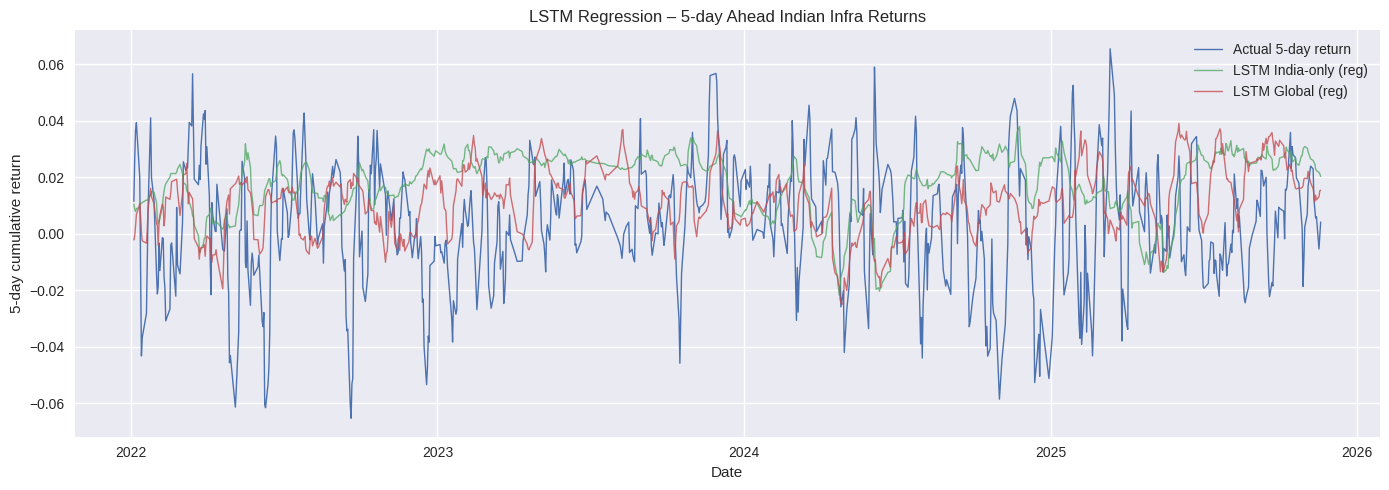

In [ ]:
fig, ax = plt.subplots(figsize=(14, 5))

ax.plot(idx_test, y_test, label="Actual 5-day return", linewidth=1)
ax.plot(idx_test, y_pred_india_reg, label="LSTM India-only (reg)", linewidth=1, alpha=0.8)
ax.plot(idx_test, y_pred_global_reg, label="LSTM Global (reg)", linewidth=1, alpha=0.8)

ax.set_title("LSTM Regression – 5-day Ahead Indian Infra Returns")
ax.set_xlabel("Date")
ax.set_ylabel("5-day cumulative return")
ax.legend()

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.tight_layout()
plt.show()


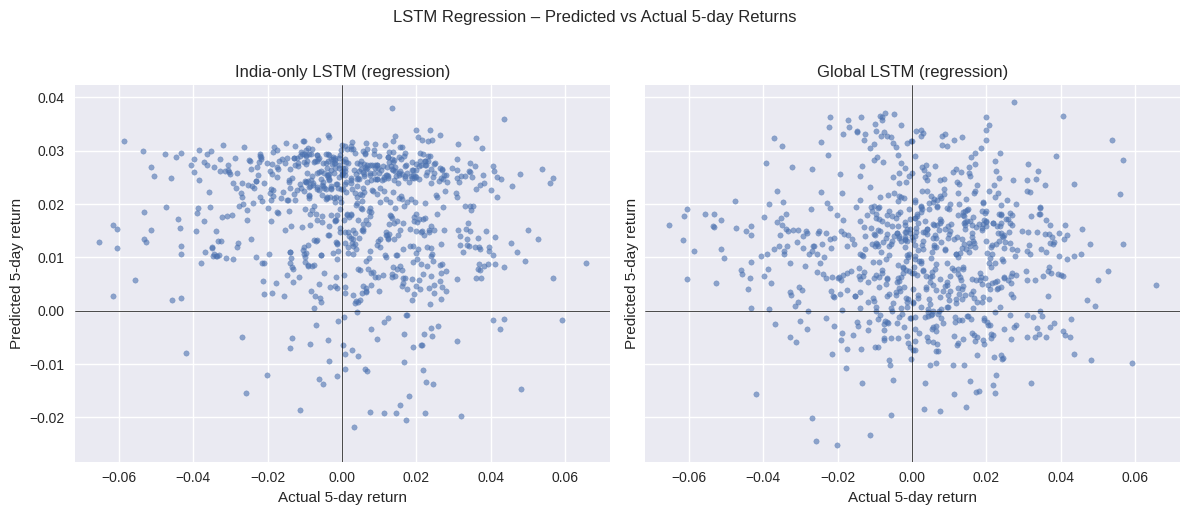

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

# India-only
axes[0].scatter(y_test, y_pred_india_reg, s=15, alpha=0.6)
axes[0].axhline(0, color="black", linewidth=0.5)
axes[0].axvline(0, color="black", linewidth=0.5)
axes[0].set_title("India-only LSTM (regression)")
axes[0].set_xlabel("Actual 5-day return")
axes[0].set_ylabel("Predicted 5-day return")

# Global
axes[1].scatter(y_test, y_pred_global_reg, s=15, alpha=0.6)
axes[1].axhline(0, color="black", linewidth=0.5)
axes[1].axvline(0, color="black", linewidth=0.5)
axes[1].set_title("Global LSTM (regression)")
axes[1].set_xlabel("Actual 5-day return")
axes[1].set_ylabel("Predicted 5-day return")

fig.suptitle("LSTM Regression – Predicted vs Actual 5-day Returns", y=1.02)
plt.tight_layout()
plt.show()


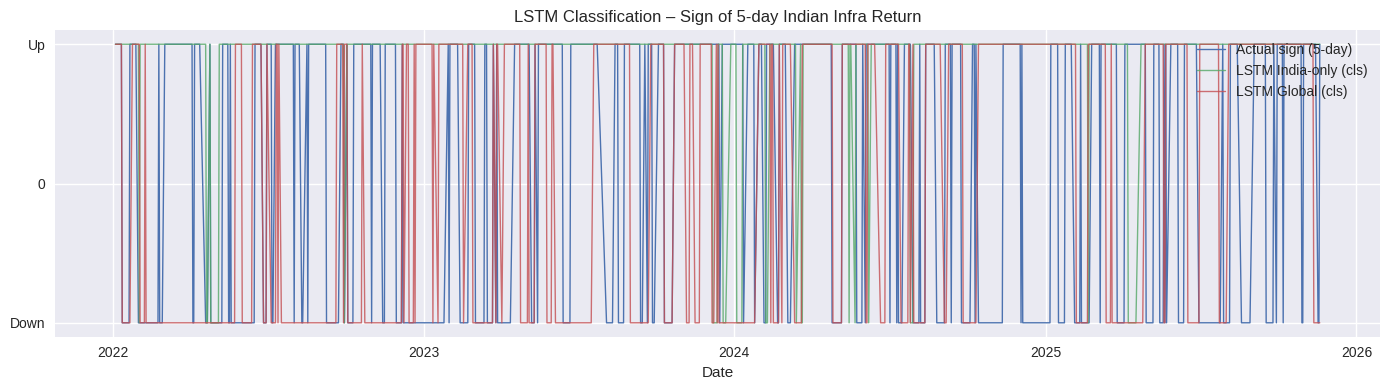

In [ ]:
# Map class labels to -1 / +1 for nicer plots
true_sign = np.where(y_test_cls == 1, 1, -1)
pred_sign_india = np.where(y_pred_label_india == 1, 1, -1)
pred_sign_global = np.where(y_pred_label_global == 1, 1, -1)

fig, ax = plt.subplots(figsize=(14, 4))

ax.plot(idx_test, true_sign, label="Actual sign (5-day)", linewidth=1)
ax.plot(idx_test, pred_sign_india, label="LSTM India-only (cls)", linewidth=1, alpha=0.8)
ax.plot(idx_test, pred_sign_global, label="LSTM Global (cls)", linewidth=1, alpha=0.8)

ax.set_title("LSTM Classification – Sign of 5-day Indian Infra Return")
ax.set_xlabel("Date")
ax.set_yticks([-1, 0, 1])
ax.set_yticklabels(["Down", "0", "Up"])
ax.legend(loc="upper right")

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.tight_layout()
plt.show()


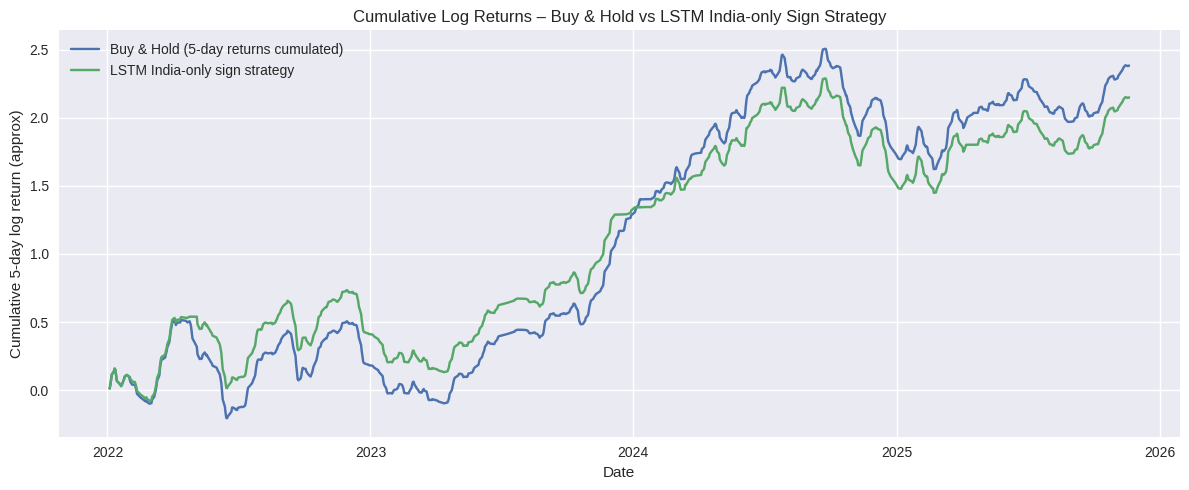

In [ ]:
# Buy-and-hold on the 5-day returns (approx cumulative)
cum_bh = y_test.cumsum()

# Strategy: long when model says "up", flat otherwise
strategy_ret_india = np.where(y_pred_label_india == 1, y_test, 0.0)
cum_strat_india = strategy_ret_india.cumsum()

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(idx_test, cum_bh, label="Buy & Hold (5-day returns cumulated)")
ax.plot(idx_test, cum_strat_india, label="LSTM India-only sign strategy")

ax.set_title("Cumulative Log Returns – Buy & Hold vs LSTM India-only Sign Strategy")
ax.set_xlabel("Date")
ax.set_ylabel("Cumulative 5-day log return (approx)")
ax.legend()

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.tight_layout()
plt.show()
